In [1]:
import os
import glob
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bike accident stats
\# is a header lvl1<br>
\#\# is a header lvl2<br>
Hier schreibt ihr eine schöne Einleitung, damit alle das Notebook und die IDee verstehen<br>
...<br>
We want to get to know the data ...<br>
some description, maybe even *bold* or _italic_ text
1. List
2. are
    * also quite nice
    * to describe
3. something

Schaut euch einfach mal folgenden Link an:
```
https://www.markdownguide.org/cheat-sheet/
or add some code block
```

- [x] checkout link
- [ ] tryout to write something in markdown
- [ ] make all description even nicer

## Data imports

In [2]:
filepath2016 = 'data/2016/Unfallorte_2016_LinRef.txt'
filepath2017 = 'data/2017/Unfallorte2017_LinRef.txt'
filepath2018 = 'data/2018/Unfallorte2018_LinRef.txt'
filepath2019 = 'data/2019/Unfallorte2019_LinRef.txt'

In [3]:
df_2016 = pd.read_csv(filepath2016, delimiter=';',decimal=',')
df_2017 = pd.read_csv(filepath2017, delimiter=';',decimal=',')
df_2018 = pd.read_csv(filepath2018, delimiter=';',decimal=',')
df_2019 = pd.read_csv(filepath2019, delimiter=';',decimal=',')

/Users/philippkahler/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data cleansing
`link the description here`
1. Figure out column names and change accordingly (so we can concat the dataframes)

In [4]:
# change column naming, so we can concat the dfs
df_2016.rename(columns={'IstStrasse': 'STRZUSTAND'}, inplace=True)
df_2017.rename(columns={'LICHT': 'ULICHTVERH'}, inplace=True)
df_2018.rename(columns={'OBJECTID_1': 'OBJECTID'}, inplace=True)
df_2019.rename(columns={'IstSonstige': 'IstSonstig'}, inplace=True)

In [5]:
df_2016.drop('FID', axis=1, inplace=True)

In [6]:
# checksum dfs
rows2016 = len(df_2016)
rows2017 = len(df_2017)
rows2018 = len(df_2018)
rows2019 = len(df_2019)
print(f'Rows 2016: {rows2016}')
print(f'Rows 2017: {rows2017}')
print(f'Rows 2018: {rows2018}')
print(f'Rows 2019: {rows2019}')

Rows 2016: 151673
Rows 2017: 195229
Rows 2018: 211868
Rows 2019: 268370


In [7]:
# raw dataframe for further analysis and visualisation
dfs = [df_2016, df_2017, df_2018, df_2019]
df_raw = pd.concat(dfs)
print(f'Rows df_raw (concatenated): \t{len(df_raw)}')
print(f'Rows source dfs: \t\t{rows2016+rows2017+rows2018+rows2019}')

Rows df_raw (concatenated): 	827140
Rows source dfs: 		827140


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827140 entries, 0 to 268369
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID    827140 non-null  int64  
 1   ULAND       827140 non-null  int64  
 2   UREGBEZ     827140 non-null  int64  
 3   UKREIS      827140 non-null  int64  
 4   UGEMEINDE   827140 non-null  int64  
 5   UJAHR       827140 non-null  int64  
 6   UMONAT      827140 non-null  int64  
 7   USTUNDE     827140 non-null  int64  
 8   UWOCHENTAG  827140 non-null  int64  
 9   UKATEGORIE  827140 non-null  int64  
 10  UART        827140 non-null  int64  
 11  UTYP1       827140 non-null  int64  
 12  ULICHTVERH  827140 non-null  int64  
 13  STRZUSTAND  827140 non-null  int64  
 14  IstRad      827140 non-null  int64  
 15  IstPKW      827140 non-null  int64  
 16  IstFuss     827140 non-null  int64  
 17  IstKrad     827140 non-null  int64  
 18  IstGkfz     631911 non-null  float64
 19  Is

In [9]:
df_raw.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,UIDENTSTLA
0,1,1,0,53,120,2016,1,9,5,2,...,1,0,0,0.0,0,606982.393999999970000,5954659.924999999800000,10.621659329000000,53.729614888000000,NaN
1,2,1,0,57,10,2016,1,17,3,3,...,1,0,0,0.0,0,574882.533000000050000,6011440.850999999800000,10.149175783000000,54.245452583999999,NaN
2,3,1,0,62,8,2016,1,0,5,3,...,1,0,0,0.0,0,599934.687500000000000,5964608.596199999600000,10.518094344000000,53.820402504999997,NaN
3,4,1,0,3,0,2016,1,15,5,3,...,0,0,0,0.0,1,610709.348699999970000,5968284.242300000000000,10.683020702000000,53.851243101000001,NaN
4,5,1,0,55,28,2016,1,14,1,3,...,1,0,0,0.0,0,605690.790400000060000,6009152.214700000400000,10.620986018000000,54.219458582000001,NaN


### Describe data
We want to get to know the data ...<br>
some description, maybe even *bold* or _italic_ text
1. List
2. are
    * also quite nice
    * to describe
3. something

Schaut euch einfach mal folgenden Link an:
```
https://www.markdownguide.org/cheat-sheet/
or add some code block
```

- [x] checkout link
- [ ] tryout to write something in markdown
- [ ] make all description even nicer

In [13]:
df_raw.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig
count,827140.00000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,631911.000000,827140.000000
mean,107618.05428,7.485727,2.780850,41.650878,74.444528,2017.721686,6.719216,13.267426,4.100752,2.790679,3.962610,3.844081,0.436658,0.282557,0.260616,0.810794,0.088249,0.143469,0.051327,0.109625
std,66672.85815,3.522928,2.251166,25.728318,114.846793,1.102954,3.235969,4.805245,1.870905,0.431494,2.562454,2.120376,0.793444,0.500551,0.438971,0.391673,0.283656,0.350551,0.220664,0.312422
min,1.00000,1.000000,0.000000,1.000000,0.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51697.00000,5.000000,1.000000,16.000000,0.000000,2017.000000,4.000000,10.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,103393.00000,8.000000,3.000000,37.000000,22.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,156228.00000,9.000000,4.000000,62.000000,118.000000,2019.000000,9.000000,17.000000,6.000000,3.000000,5.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,268370.00000,16.000000,9.000000,91.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# filter with loc
# condition in []
df_raw.loc[df_raw["STRZUSTAND"]>0]

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,UIDENTSTLA
0,1,1,0,53,120,2016,1,9,5,2,...,1,0,0,0.0,0,606982.393999999970000,5954659.924999999800000,10.621659329000000,53.729614888000000,NaN
1,2,1,0,57,10,2016,1,17,3,3,...,1,0,0,0.0,0,574882.533000000050000,6011440.850999999800000,10.149175783000000,54.245452583999999,NaN
4,5,1,0,55,28,2016,1,14,1,3,...,1,0,0,0.0,0,605690.790400000060000,6009152.214700000400000,10.620986018000000,54.219458582000001,NaN
5,6,1,0,61,44,2016,1,17,6,3,...,1,0,0,0.0,0,542547.328499999950000,5963921.747000000400000,9.646338030000001,53.822093844999998,NaN
7,8,1,0,55,29,2016,1,11,1,2,...,1,0,0,0.0,0,623911.704400000050000,6008211.261900000300000,10.899895740000000,54.206924608999998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268363,268364,7,3,12,0,2019,12,17,1,3,...,1,1,0,0.0,0,410518.374353397640000,5476893.348484449100000,7.765736382000057,49.438117568000052,NaN
268365,268366,7,3,15,0,2019,12,18,1,3,...,0,1,0,0.0,0,447451.870000000110000,5538758.230000002300000,8.266788796000071,49.998830410000039,NaN
268367,268368,7,3,12,0,2019,12,12,7,3,...,1,0,0,0.0,0,410972.391108420680000,5477309.075609600200000,7.771903968000061,49.441922803000068,NaN
268368,268369,7,3,18,0,2019,12,18,7,3,...,1,0,0,0.0,0,458759.260020965710000,5463484.891345262500000,8.432482387000050,49.322701564000056,NaN


### transform data and enrich data

In [15]:
# Zuweisung zu neuer Spalte mit Namen `x_coord_short`
df_raw['lat_short']=round(df_raw['XGCSWGS84'].astype(float),3)
df_raw['long_short']=round(df_raw['YGCSWGS84'].astype(float),3)
print(df_raw['lat_short'].min())
print(df_raw['lat_short'].max())
print(df_raw['long_short'].min())
print(df_raw['long_short'].max())
#--> stimmen die Grenzen? Gibt es Ausreißer?

5.867
15.029
47.319
55.037


In [16]:
# Gibt es eine Dokumenation, die ihr hier verlinken könntet?
districts = {1:"Hamburg-Mitte", 2:"Altona", 3:"Eimsbüttel", 4:"Hamburg-Nord", 5:"Wandsbek", 6:"Bergedorf", 7:"Harburg", 9:"andere2", 0:"andere"}

In [18]:
# die Bezirke müssen noch angepasst werden, danach könnt ihr die 2. Zeile wieder "einkommentieren" und ausführen
df_raw['UREGBEZ'].apply(lambda x:bezirke[x])
#df['district']= df_raw['UREGBEZ'].apply(lambda x:bezirke[x])

0             andere
1             andere
2             andere
3             andere
4             andere
             ...    
268365    Eimsbüttel
268366    Eimsbüttel
268367    Eimsbüttel
268368    Eimsbüttel
268369    Eimsbüttel
Name: UREGBEZ, Length: 827140, dtype: object

In [ ]:
df_raw.head()

In [ ]:
print('a')

In [11]:
df = df_raw

## Data visualising

<AxesSubplot:xlabel='UMONAT', ylabel='count'>

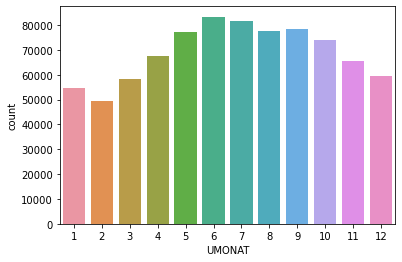

In [12]:
sns.countplot(data=df, x="UMONAT")

## Modelling

# Testing area